<a href="https://www.kaggle.com/code/rezniknn/yp-integrated-project-4?scriptVersionId=182410117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/rezniknn/yp-integrated-project-4?scriptVersionId=182029127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Алексей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но было бы корректнее вначале заголовок + описание, а уже затем код (и кодовые ячейки мы начинаем конечно же с импортов.
    
    
    
</div>

# Сборный проект 4
### Задача

Необходимо разработать демонстрационную версию поиска изображений по запросу.
Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## Исследовательский анализ данных

In [1]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 8.7 MB/s eta 0:00:00


In [2]:
import os
import gc

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

from transformers import BertTokenizer, BertModel

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

from tqdm import notebook

from sentence_transformers import SentenceTransformer, util

2024-06-09 15:11:37.805086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 15:11:37.805194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 15:11:37.926097: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
DATA_PATH = '/kaggle/input/dsplus-sp4/to_upload'

### Оценки исполнителей

In [4]:
df_crowd = pd.read_csv(
    os.path.join(DATA_PATH, 'CrowdAnnotations.tsv'),
    sep='\t',
    header=None,
    names=['file_name', 'desc_id', 'share_match', 'match', 'mismatch']
)
df_crowd.head()

file_name                      desc_id  share_match  match  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2          1.0      3   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2          0.0      0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2          0.0      0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2          0.0      0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2          0.0      0   

   mismatch  
0         0  
1         3  
2         3  
3         3  
4         3

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Убрал хардкод путей к файлам, вынес путь к директории с данными в константу

</div>

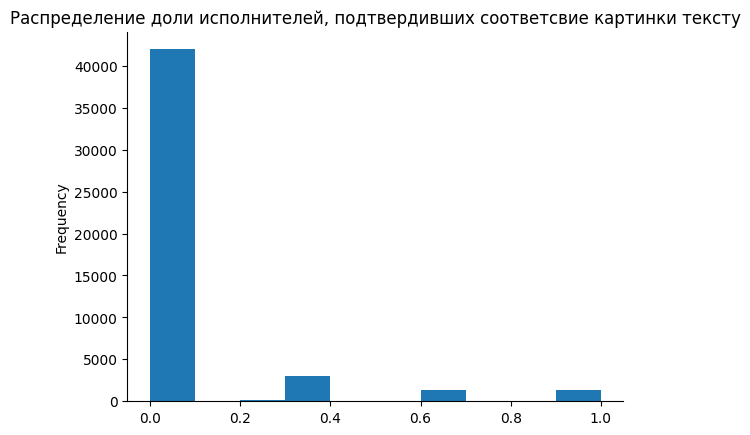

In [5]:
df_crowd['share_match'].plot(kind='hist', title='Распределение доли исполнителей, подтвердивших соответсвие картинки тексту')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df_crowd['share_match'].value_counts()

share_match
0.000000    41970
0.333333     3000
0.666667     1360
1.000000     1323
0.250000       96
0.500000       27
0.200000       22
0.750000        9
0.600000        8
0.400000        8
0.800000        4
0.166667        3
Name: count, dtype: int64

In [7]:
df_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_name    47830 non-null  object 
 1   desc_id      47830 non-null  object 
 2   share_match  47830 non-null  float64
 3   match        47830 non-null  int64  
 4   mismatch     47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Данные с оценками исполнителей содержат 47830 пар имя картинки - идентификатор описания. Из распределения доли оценок исполнителей, подтвердивших соответсвие картинки и текста, можно сделать вывод, что подавляющее большинство изображений не соответствует описанию и соответсвует не совсем точно и лишь небольшая доля изображений (<3%) полностью соответствует описанию, по мнению исполнителей

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Оценки экспертов

In [8]:
df_expert = pd.read_csv(
    os.path.join(DATA_PATH, 'ExpertAnnotations.tsv'),
    sep='\t', 
    header=None, 
    names=['file_name', 'desc_id', 'score_1', 'score_2', 'score_3']
)
df_expert.head()

file_name                      desc_id  score_1  score_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2        1        1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2        1        1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2        1        1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2        1        2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2        1        1   

   score_3  
0        1  
1        2  
2        2  
3        2  
4        2

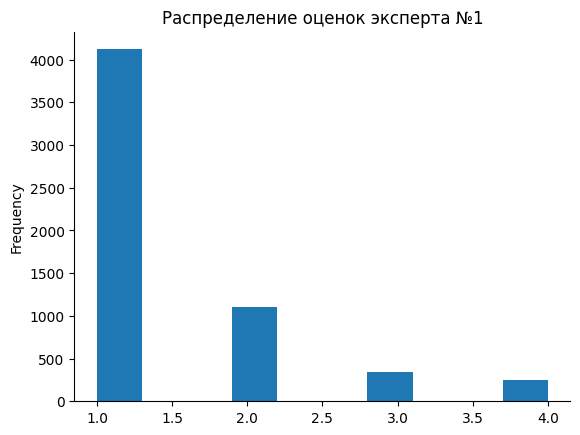

In [9]:
df_expert['score_1'].plot(kind='hist', title='Распределение оценок эксперта №1')
plt.gca().spines[['top', 'right',]].set_visible(False)

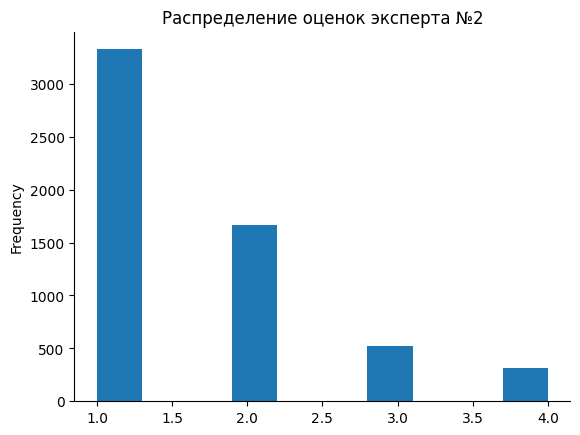

In [10]:
df_expert['score_2'].plot(kind='hist', title='Распределение оценок эксперта №2')
plt.gca().spines[['top', 'right',]].set_visible(False)

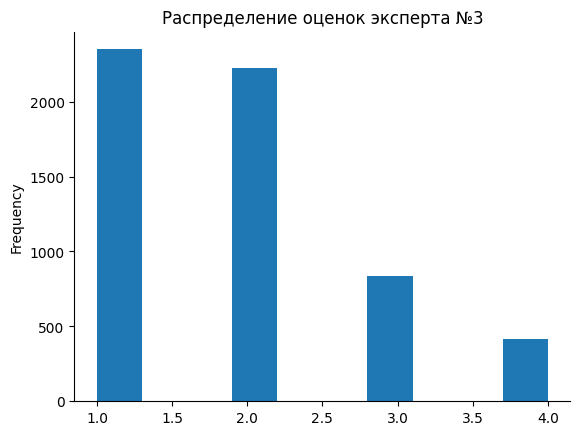

In [11]:
df_expert['score_3'].plot(kind='hist', title='Распределение оценок эксперта №3')
plt.gca().spines[['top', 'right',]].set_visible(False)

Данные с оценками экспертов содержат 5822 пар имя картинки - идентификатор описания, что намного меньше количества записей с оценками исполнителей. То есть как минимум для части изображений отсутствуют данные об оценках экспертов.

Из распределения оценок экспертов можно сделать выводы, что оценки 1 и 2, говорящие о низком соответсвии изображения картинке встречаются наиболее часто, в то время как оценки 3 и особенно 4 встречаются редко. Так же можно заключить, что эксперт №1 присваивает высокии оценки соответсвия реже, чем эксперты №2 и №3

### Обучающая выборка

In [12]:
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
df_train.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [14]:
len(df_train['image'].unique())

1000

In [15]:
len(df_train['query_id'].unique())

977

In [16]:
len(df_train['query_text'].unique())

977

In [17]:
df_train.duplicated().sum()

0

В обучающей выборке содержатся 5822 записей с информацией об 1000 уникальных изображений и 977 уникальных описаний изображений, то есть одному изображению может соответствовать несколько описаний, а так же к одному описанию может подходить несколько изображений.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Получен итоговый датафрейм признаки/таргет (из 2329 записей) и это достижение. 
    
Но, как я писал тебе выше, данных потеряно слишком много и все-таки  нужно изменить стратегию объединения датафреймов. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Раздел работы с оценками и объединением оценок с тренировочными данными перенесен ниже

</div>

### Тестовая выборка

In [18]:
df_test_images = pd.read_csv(os.path.join(DATA_PATH, 'test_images.csv'))
df_test_images.head()

image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg

In [19]:
df_test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [20]:
len(df_test_images['image'].unique())

100

In [21]:
df_test_queries = pd.read_csv(os.path.join(DATA_PATH, 'test_queries.csv'), delimiter='|', index_col = 0)
df_test_queries.head()

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

In [22]:
df_test_queries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [23]:
len(df_test_queries['image'].unique())

100

In [24]:
len(df_test_queries['query_id'].unique())

500

In [25]:
len(df_test_queries['query_text'].unique())

500

In [26]:
df_test = pd.merge(df_test_images, df_test_queries, on='image')
df_test.head()

image                     query_id  \
0  3356748019_2251399314.jpg  3356748019_2251399314.jpg#0   
1  3356748019_2251399314.jpg  3356748019_2251399314.jpg#1   
2  3356748019_2251399314.jpg  3356748019_2251399314.jpg#2   
3  3356748019_2251399314.jpg  3356748019_2251399314.jpg#3   
4  3356748019_2251399314.jpg  3356748019_2251399314.jpg#4   

                                          query_text  
0  Cyclists are leaping into the air whilst being...  
1          Three dirt bike racers head over a jump .  
2  Three men form an arch during a BMX bike race ...  
3  Three men on mountain bikes go over a sand hill .  
4  Three riders wearing black jerseys jump their ...

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       500 non-null    object
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


Тестовая выборка содержит 100 изображений, а так же 500 пар соответствий изображения и текстового описания

### Суммарная оценка соответствия

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
ОК, у твоего проекта уже есть структура, возможно менять уже не стоит.
    
Но на будущее рекомендую для себя четко выделить этапы. Вначале знакомимся со всеми данными,обдумываем (пишем выводы по результату исследования) и уже затем начинаем данными жонглировать, т.е. делать предобработку, целью которой является получение итогового датафрейма признаки-таргет.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Учел

</div>

In [28]:
df_crowd.shape

(47830, 5)

In [29]:
df_expert.shape

(5822, 5)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    
    
    
Сейчас ты присоединил  экспертные оценки к и краудсорс оценкам (через left). Это приводит к тому, что после соединения с df_train ты будешь иметь всего 2329 записей (по сути это соединение через inner).
    
Пожалуйста выбери какую-нибудь другую стратегию соединения датафреймов, где мы будем иметь несколько больше данных.
    
------------------
    
Данная ошибка является хорошей иллюстрацией моего совета: вначале познакомимся с данными, подумаем а затем начнем их "крутить".    


</div>

In [30]:
pd.merge(df_expert, df_crowd, on=('file_name', 'desc_id')).shape

(2329, 8)

Датафрейм пересечения экспертных оценок и краудсорсинговых оценок содержит всего 2329 строк, тогда как изначальный датафрейм с экспертными оценками содержит 5822 строк. Так как краудсорсинговые оценки заведомо менее точные, чем оценки экспертов, и добавление датафрейма с краудсорсинговыми оценками снижает выборку экспертных оценок более чем в 2 раза, для дальнейшей работы и подсчета коэффициента соответсвия изображений и текстовых описаний будет работать только с оценками экспертов для достижения наибольшего качества данных

In [31]:
df_expert['match_score'] = (
    (df_expert['score_1'] - 1)/3 
    + (df_expert['score_2'] - 1)/3 
    + (df_expert['score_3'] - 1)/3
)/3
df_expert.head()

file_name                      desc_id  score_1  score_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2        1        1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2        1        1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2        1        1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2        1        2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2        1        1   

   score_3  match_score  
0        1     0.000000  
1        2     0.111111  
2        2     0.111111  
3        2     0.222222  
4        2     0.111111

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
В логике перерасчета  экспертных оценок допущена ошибка.

Что такое деление на 12?

Это два шага. Деля на 3 мы находим среднее трех экспертов, здесь соглашусь.


А дальше ты делишь на 4 потому что максимальная оценка равна 4. Но минимальная оценка равна 1, и ты получаешь минимальную оценку эксперта равную 0,25. Но мы то стремимся перевести в шкалу 0-1.


Попробуй другую формулу:

`(средння оценка  - 1) / 4`
  

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ну и брать среднюю оценку между экспертной и крауд на мой взгляд это слишком сильно ухудшает данные... Даже в рекомендациях авторов проекта были пропорции 7/3
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Окей, согласен с тем, что изначальная стратегия подсчета оценки соответсвия не лучшая. Оставил только данные с оценками экспертов, исправил ошибку в номрализации: сдвигаю сначала каждую оценку экспертов из диапозона 1-4 в диапозон 0-3, делю каждую оценку на 3 чтобы перевести в диапозон 0-1, затем нахожу среднее из трех чисел

</div>

In [32]:
df_expert = df_expert[['file_name', 'desc_id', 'match_score']]
df_expert.head()

file_name                      desc_id  match_score
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2     0.000000
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2     0.111111
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2     0.111111
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2     0.222222
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2     0.111111

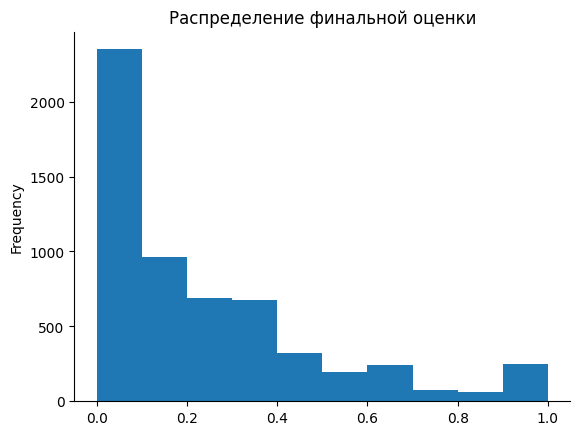

In [33]:
df_expert['match_score'].plot(kind='hist', title='Распределение финальной оценки')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
df_expert['match_score'].describe()

count    5822.000000
mean        0.215886
std         0.268735
min         0.000000
25%         0.000000
50%         0.111111
75%         0.333333
max         1.000000
Name: match_score, dtype: float64

Оценки экспертов были объединены в единый коэффициент соответсвия изображения описанию, приведенный к диапозону [0, 1]

In [35]:
df_train_with_scores = pd.merge(
    df_train,
    df_expert,
    left_on=('image', 'query_id'),
    right_on=('file_name', 'desc_id')
    )[['image', 'query_id', 'query_text', 'match_score']]
df_train_with_scores.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  match_score  
0  A young child is wearing blue goggles and sitt...     0.000000  
1  A young child is wearing blue goggles and sitt...     0.000000  
2  A young child is wearing blue goggles and sitt...     0.222222  
3  A young child is wearing blue goggles and sitt...     1.000000  
4  A young child is wearing blue goggles and sitt...     0.000000

In [36]:
df_train_with_scores.shape

(5822, 4)

**Выводы**:


*   Данные с оценками исполнителей содержат 47830 пар имя картинки - идентификатор описания. Из распределения доли оценок исполнителей, подтвердивших соответсвие картинки и текста, можно сделать вывод, что подавляющее большинство изображений не соответствует описанию и соответсвует не совсем точно и лишь небольшая доля изображений (<3%) полностью соответствует описанию, по мнению исполнителей

*   Данные с оценками экспертов содержат 5822 пар имя картинки - идентификатор описания, что намного меньше количества записей с оценками исполнителей. То есть как минимум для части изображений отсутствуют данные об оценках экспертов. Из распределения оценок экспертов можно сделать выводы, что оценки 1 и 2, говорящие о низком соответсвии изображения картинке встречаются наиболее часто, в то время как оценки 3 и особенно 4 встречаются редко. Так же можно заключить, что эксперт №1 присваивает высокии оценки соответсвия реже, чем эксперты №2 и №3

*   В обучающей выборке содержатся 5822 записей с информацией об 1000 уникальных изображений и 977 уникальных описаний изображений, то есть одному изображению может соответствовать несколько описаний, а так же к одному описанию может подходить несколько изображений. После объединения информации об изображениях и текстовых описаниях в обучающей выборке с финальным коэффициентом соответсвия, полученным на основе оценок исполнителей и экспертов, получился набор данных размером 2329 записей, содержащий 766 уникальных описаний для 891 уникальных изображений

*   Тестовая выборка содержит 100 изображений, а так же 500 пар соответствий изображения и текстового описания

*   Датафрейм пересечения экспертных оценок и краудсорсинговых оценок содержит всего 2329 строк, тогда как изначальный датафрейм с экспертными оценками содержит 5822 строк. Так как краудсорсинговые оценки заведомо менее точные, чем оценки экспертов, и добавление датафрейма с краудсорсинговыми оценками снижает выборку экспертных оценок более чем в 2 раза, для дальнейшей работы и подсчета коэффициента соответсвия изображений и текстовых описаний будет работать только с оценками экспертов для достижения наибольшего качества данных

*   Оценки экспертов были объединены в единый коэффициент соответсвия изображения описанию, приведенный к диапозону [0, 1]






## Проверка данных

In [37]:
len(df_train_with_scores['query_id'].unique())

977

In [38]:
blacklist_keywords = [
    'child', 
    'kid', 
    'kids', 
    'girl', 
    'boy', 
    'toddler', 
    'infant', 
    'minor', 
    'teenager', 
    'baby', 
    'daughter', 
    'juvenile', 
    'offspring', 
    'son', 
    'youngster', 
    'youth'
]

In [39]:
len(blacklist_keywords)

16

In [40]:
queries_to_remove = df_train_with_scores[
    df_train_with_scores['query_text'].str.contains('|'.join(blacklist_keywords))
]['query_id']
queries_to_remove.head()

0    2549968784_39bfbe44f9.jpg#2
1    2549968784_39bfbe44f9.jpg#2
2    2549968784_39bfbe44f9.jpg#2
3    2549968784_39bfbe44f9.jpg#2
4    2549968784_39bfbe44f9.jpg#2
Name: query_id, dtype: object

In [41]:
len(queries_to_remove.unique())

322

In [42]:
images_to_remove = queries_to_remove.apply(lambda x: x.split('#')[0])
images_to_remove.head()

0    2549968784_39bfbe44f9.jpg
1    2549968784_39bfbe44f9.jpg
2    2549968784_39bfbe44f9.jpg
3    2549968784_39bfbe44f9.jpg
4    2549968784_39bfbe44f9.jpg
Name: query_id, dtype: object

In [43]:
len(images_to_remove.unique())

322

In [44]:
df_train_filtered = df_train_with_scores[~df_train_with_scores['image'].isin(images_to_remove)]

In [45]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3918 entries, 0 to 5820
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        3918 non-null   object 
 1   query_id     3918 non-null   object 
 2   query_text   3918 non-null   object 
 3   match_score  3918 non-null   float64
dtypes: float64(1), object(3)
memory usage: 153.0+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Классный способ, не подумал про это. Обновил код фильтрации записей.

</div>

Для исключения изображений, потенциально нарушающих законадательство стран, в которых будет работать сервис поиска по изображениям, был составлен список из 16 ключевых слов, присутсвие которых в описании изображения указывает на возможное нарушения законадательства. 322 уникальных описания изображений не прошли фильтр и изображения, соотетствующие этим описаниям (соответсвие установлено на основе содержания поля `query_id`, т.к. идентификатор описания содержит идентификатор изображения). Таким образом после удаления из тренировочного набора данных изображений, соответсвующих непрошедшим фильтр описаниям, в тренировочном наборе данных осталось 3918 записей.

## Векторизация текстов


In [46]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [47]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [48]:
encoded_input = tokenizer(
    df_train_filtered['query_text'].tolist(), 
    return_tensors='pt', 
    padding='max_length', 
    truncation=True,
    max_length=30
)

In [49]:
batch_size = 100
total_len = encoded_input['input_ids'].shape[0]
n_batches = 1 + total_len // batch_size
embeddings = []

for i in notebook.tqdm(range(n_batches)):

        if (i != n_batches):
            t = encoded_input['input_ids'][batch_size*i:batch_size*(i+1)].to(device)
            tt = encoded_input['token_type_ids'][batch_size*i:batch_size*(i+1)].to(device)
            am = encoded_input['attention_mask'][batch_size*i:batch_size*(i+1)].to(device)
        else:
            t = encoded_input['input_ids'][batch_size*i:total_len].to(device)
            tt = encoded_input['token_type_ids'][batch_size*i:total_len].to(device)
            am = encoded_input['attention_mask'][batch_size*i:total_len].to(device)

        inputs = {
            'input_ids' : t, 
            'token_type_ids' : tt, 
            'attention_mask' : am
        }
        
        with torch.no_grad():
            batch_embeddings = model(**inputs)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().detach().numpy())

  0%|          | 0/40 [00:00<?, ?it/s]

In [50]:
embeddings[0].shape

(100, 768)

In [51]:
features_text = np.concatenate(embeddings)

In [52]:
features_text.shape

(3918, 768)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ты выполнил токенизацию, т.е.  разрезал текст на кусочки (токены) и каждому токену назначил номер (просто взяв его из словаря).


Но что-бы эмбеддинги текста обрели смысл (магию эмбедингов, когда между ними появляются какие-то взаимосвязи) нужно прогнать эти токены через модель, как это было показано в спринте по текстам.
    
------------
    
При правильной векторизации размерность вектора признака должна быть 768 (внутренняя размерность эмбеддинга классического BERT    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Ага, упущение. Добавил вызов самой модели после разбиения на токены, теперь на выходе кажется действительно получаются эмбеддинги и размерность совпадает

</div>

С помощью модели Bert текст описания изображений был приведен в векторный вид, размерность вектора признаков, полученных из текстовых описаний - (3918, 768)

## Векторизация изображений

In [53]:
df_train_filtered.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
6  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
7  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  match_score  
0  A young child is wearing blue goggles and sitt...          0.0  
1  A young child is wearing blue goggles and sitt...          0.0  
4  A young child is wearing blue goggles and sitt...          0.0  
6  A young child is wearing blue goggles and sitt...          0.0  
7  A young child is wearing blue goggles and sitt...          0.0

In [54]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Давай вспомним, что в спринте по компьютерному зрению, прежде чем пропускать изображение через модель мы делали измнение масштаба (rescale), деля значение из диапазона 0-255 на 255, чтобы получить значение из диапазона 0-1.
    
Но и это не самый лучший вариант:  Чтобы эмбеддинги  были качественными, стоит использовать специальную предобработку, повторяющую условия, при которых модель обучалась. 
    
В разделе "компьютерное зрение с pytorch" приведен образец кода, как проводить эту предобработку при использовани моделей pytorch.
    
В случае Keras нужно использовать специальную фукнцию preprocess_input
    
    from keras.applications.resnet50 import preprocess_input
    ...
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
--------------
    
Пожалуйста используй любой метод препроцессигна изображения (но лучше preprocessing_function)     
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Да, про предобработку забыл, добавил

</div>

In [55]:
train_datagen_flow = train_datagen.flow_from_dataframe(
    df_train_filtered,
    os.path.join(DATA_PATH, 'train_images'),
    x_col='image',
    y_col='match_score',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training',
    seed=12345,
    shuffle=False
)

Found 3918 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Вот здесь проблема, и она заключается в том, что  у flow_from_dataframe есть дефолтный аргумент shuffle=True, а значит выдаваемые им изображения перемешиваются, и идут совсем не в том порядке,как в датфрейме.  Как следствие мы получаем эмбеддинги не соответствующие изображениям в датафрейме.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
:facepalm

</div>

In [56]:
image_vec_model =  ResNet50(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False,
    pooling='max'
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [57]:
features_image = image_vec_model.predict(train_datagen_flow)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/123 ━━━━━━━━━━━━━━━━━━━━ 15:15 8s/step

I0000 00:00:1717945950.214511      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/123 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step


In [58]:
features_image.shape

(3918, 2048)

С помощью предобученной нейронной сети ResNet50 из исходных изображений был извлечен вектор признаков размерностью (3918, 2048), который в дальнейшем будет использован для обучения регрессионных моделей

## Объединение векторов

In [59]:
features_image.shape

(3918, 2048)

In [60]:
features_text.shape

(3918, 768)

In [61]:
features = np.concatenate((features_image, features_text), axis=1)

In [62]:
features.shape

(3918, 2816)

In [63]:
target = df_train_filtered['match_score'].values

In [64]:
target.shape

(3918,)

In [65]:
groups = df_train_filtered['image']

In [66]:
groups.shape

(3918,)

Финальный векторов признаков, на котором будут обучаться модели, состоящий из признаков изображений и эмбеддингов текстовых описаний, имеет размерность (3918, 2816)

## Обучение модели предсказания соответствия

In [67]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, valid_indices = next(gss.split(X=features, y=target, groups=groups))

In [68]:
features_train = np.take(features, train_indices, axis=0)
features_valid = np.take(features, valid_indices, axis=0)

In [69]:
features_train.shape

(2748, 2816)

In [70]:
features_valid.shape

(1170, 2816)

In [71]:
target_train = np.take(target, train_indices)
target_valid = np.take(target, valid_indices)

In [72]:
target_train.shape

(2748,)

In [73]:
target_valid.shape

(1170,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

### Масштабирование признаков

In [74]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_valid_scaled = scaler.transform(features_valid)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

Скаллер (как и большинство инструментов машинного обучения) должен обучаться на обучающей выборке, а затем применяться к валидационной и тестовой.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Перенс этот раздел после разбивки на тренировочную/валидационную выборку

</div>

In [75]:
features_train_scaled

array([[-0.47771084, -1.527085  , -1.0679324 , ...,  1.196364  ,
         0.23057736,  1.6650919 ],
       [-0.00861437, -1.142628  , -1.0679324 , ...,  1.196364  ,
         0.23057736,  1.6650919 ],
       [-0.49679622, -0.14504659, -0.54521716, ...,  1.196364  ,
         0.23057736,  1.6650919 ],
       ...,
       [-0.94399136, -1.0541108 ,  0.38282713, ..., -1.2650445 ,
        -0.36365277,  0.07896465],
       [ 0.4842655 , -0.62495935, -0.9052918 , ...,  2.406227  ,
         0.5194266 , -0.4044795 ],
       [-0.28764012, -1.0824811 ,  0.56632334, ...,  0.25254425,
        -0.93362004, -0.5545983 ]], dtype=float32)

In [76]:
target_train

array([0.        , 0.        , 0.        , ..., 0.        , 0.11111111,
       0.55555556])

Вектора признаков изображений и текстовых описаний были объединены в единый вектор признаков, итоговая размерность вектора признаков - (1232, 2138). Признаки были масштабированы с помощью StandardScaler

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Ниже добавил раздел с выбором метрики и привел несколько аргументов, почему выбрал имеено MSE

</div>

### Выбор метрики



В качестве метрики для оптимизации и для оценки качества работы регрессионных моделей будем использовать метрику Mean Squared Error, так как
- MSE - простая и интуитивная для интерпретации метрика
- MSE является непрерывной и дифференцируемой функцией, упрощает процесс обучения модели, так как позволяет эффективно вычислять градиенты и обновлять параметры модели

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавил

</div>

### Случайная модель

In [77]:
dummyreg_model = DummyRegressor(strategy="mean")
dummyreg_model.fit(features_train, target_train)
print("Train MSE: %.2f" % mean_squared_error(target_train, dummyreg_model.predict(features_train)))
print("Validation MSE: %.2f" % mean_squared_error(target_valid, dummyreg_model.predict(features_valid)))

Train MSE: 0.08
Validation MSE: 0.08


### Линейная регрессия

In [78]:
linreg_model = LinearRegression()
linreg_model.fit(features_train, target_train)
print("Train MSE: %.4f" % mean_squared_error(target_train, linreg_model.predict(features_train)))
print("Validation MSE: %.4f" % mean_squared_error(target_valid, linreg_model.predict(features_valid)))

Train MSE: 0.0310
Validation MSE: 28620299.6080


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Это очень круто, что ты понимаешь, что однослойная нейронная сеть без активационой функциии это обычная линейная регрессия.


Но у самописной модели есть один нюанс - ты не можешь быть уверенным в том, что обучишь её достаточно хорошо. Поэтому для быстрого эксперимента можно взять обычную линейную регрессию из sklearn.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Использовал стандартную реализацию LinearRegression из sklearn как ты и посоветовал, так же добавил две разновидности этой модели с регуляризацией - Ridge и Lasso

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Итак, линейная модель обучена. Какие выводы мы можем сделать из всех экспериментов? Модель дико переобучается. А значит и здесь (было бы неплохо) и тем более в сложной нейронной сети стоит позаботиться о регуляризации.</div>

Для предсказания коэффициента соответсвия изображения текстовому описанию была обучена модель линейной регрессии с использованием оценки соответсвия, полученной из оценок экспертов, в качестве целевой переменной для регресии. Модель хорошо обучилась на тренировочных данных, о чем свидетельствует низкий показатель метркики среднеквадратичной ошибки, которая использовалась в качестве функции потерь. Тем не менее, значение среднеквадратичной ошибки на валидационной выборке на несколько порядков выше, чем на обучающей выборке, что свидетельствует о переобучении модели.

### Ridge Regression

In [79]:
ridgereg_model = Ridge(alpha=10, fit_intercept=True)
ridgereg_model.fit(features_train, target_train)
print("Train MSE: %.4f" % mean_squared_error(target_train, ridgereg_model.predict(features_train)))
print("Validation MSE: %.4f" % mean_squared_error(target_valid, ridgereg_model.predict(features_valid)))

Train MSE: 0.0367
Validation MSE: 0.0782


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.51034e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


### Lasso Regression

In [80]:
lassoreg_model = Lasso(alpha=0.3, fit_intercept=True)
lassoreg_model.fit(features_train, target_train)
print("Train MSE: %.4f" % mean_squared_error(target_train, lassoreg_model.predict(features_train)))
print("Validation MSE: %.4f" % mean_squared_error(target_valid, lassoreg_model.predict(features_valid)))

Train MSE: 0.0759
Validation MSE: 0.0799


С использованием моделей линейной регрессии с регуляризацией удалось существенно снизить переобучаемость модели, что видно по уменьшившейся разнице в значении метрики на обучающей и на валидационной выборках.

### Полносвязная нейронная сеть

In [81]:
feature_train_tf = torch.from_numpy(features_train).float()
target_train_tf = torch.from_numpy(target_train).float()
feature_valid_tf = torch.from_numpy(features_valid).float()
target_valid_tf = torch.from_numpy(target_valid).float()

In [82]:
def train(model, learning_rate, epochs):

    criterion = torch.nn.MSELoss() 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs = Variable(feature_train_tf.cuda())
            labels = Variable(target_train_tf.cuda())
        else:
            inputs = Variable(feature_train_tf)
            labels = Variable(target_train_tf)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (epoch == epochs - 1):
            print('Training complete. Epochs {}, learning rate {}, MSE loss {}'.format(epochs, learning_rate, loss.item()))

In [83]:
def validate(model):
    if torch.cuda.is_available():
        inputs = Variable(feature_valid_tf.cuda())
        labels = Variable(target_valid_tf.cuda())
    else:
        inputs = Variable(feature_valid_tf)
        labels = Variable(target_valid_tf)

    predictions = model(inputs).squeeze(-1)
    loss = torch.nn.MSELoss()    
    return loss(predictions, labels).item()

In [84]:
class fnnRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(fnnRegression, self).__init__()
        self.layers = nn.Sequential(
          nn.Linear(inputSize, 64),
          nn.Sigmoid(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, outputSize))

    def forward(self, x):
        out = self.layers(x)
        return out

In [85]:
inputDim = features.shape[1]
outputDim = 1
learning_rate = 0.001 
epochs = 1000

In [86]:
fnn_model = fnnRegression(inputDim, outputDim)

if torch.cuda.is_available():
    fnn_model.cuda()

train(fnn_model, learning_rate, epochs)
mse = validate(fnn_model)
print('Validation MSE:', mse)

Training complete. Epochs 1000, learning rate 0.001, MSE loss 0.07759900391101837
Validation MSE: 0.08207708597183228


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Скажу исходя из своего опыта: подбор количеста эпох это крайне расточительно с точки зрения вычислительных ресурсов.
    
Как правило нейронки учатся долго (и дорого). Поэтому никто никогда не подбирает количество эпох простым перебором. Тут работает другая логика:
    
 в процессе обучения анализируются метрики на обучающей и валидационной выборках и принимается решение продолжить обучение или прервать его (это можно сделать программно или вручную). Часто сохраняются промежуточные результаты (веса модели), достигнутые на "хороших" эпохах. Это позволяет возвращаться к удачным моделям в случае градиентного взрыва (или просто модель начала переобучаться и метрики ухудшились).
     
В случае с lr тоже работает эмпирическое правило - начинаем с lr побольше и понемногу уменьшаем его в процессе обучения (более низкий lr позволяет модели не проскакивать мимо локальных минимумов).    
    
</div>



Для предсказания коэффициента соответсвия изображения текстовому описанию была обучена полносвязная нейронная сеть с двумя скрытыми слоями и функциями активации sigmoid и relu. Были подобраны оптимальные значения скорости обучения и количеста эпох. Полносвязаная нейронная сеть показала меньшую точность по метрике среднеквадратичной ошибки на тренировочных данных, но существенно лучшую точность на валидационной выборке. Разница в метрике между тренировочной и валидацонной выборками не велика, что говорит о том, что модель хорошо обучилась и научилась хорошо обобщать выводы. 

**Выводы**

По итогам сравнения результатов работы моделей линейной регресии и полносвязной нейронной сети, лучшую точность на валидационной выборке показала модель линейной регрессии с L2 регуляризацией (Ridge Regression). В дальнейшем для тестирования работы модели и для реализации функции поиска изображения из тестовой выборке по запросу будем использрвать именно эту модель.

## Тестирование модели

In [87]:
model = model.to('cpu')

In [88]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [89]:
test_images = pd.DataFrame(df_test['image'].unique()).rename(columns={0: "image"})
test_images.head()

image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg

In [90]:
test_datagen_flow = test_datagen.flow_from_dataframe(
    test_images,
    os.path.join(DATA_PATH, 'test_images'),
    x_col='image',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    seed=12345,
    shuffle=False
)

Found 100 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже нужно решить вопросы с предобработкой изображений и перемешивании изображений flow_from_dataframe 


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил

</div>

In [91]:
features_image_test = image_vec_model.predict(test_datagen_flow)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [92]:
features_image_test.shape

(100, 2048)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
У тебя всего 100 уникальных изображений. Зачем же векторизовать 500? Получается что каждое изображение векторизовано 5 раз.
    
По моему опыту эта ошибка часто приводит к путанницам в написании итоговой функции.    
</div>



<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Хм да, не логично векторизовать одно и то же изображение несколько раз. Поменял код векторизации и код функции поиска, чтобы работать со списком уникальных изображений

</div>

In [93]:
def find_most_relevant_image(test_data, test_images, query_id, reg_model, images_vec, bert_tokenizer, bert_model, scaler):
    query_text = test_data[test_data['query_id'] == query_id]['query_text'].values[0]
    true_image = test_data[test_data['query_id'] == query_id]['image'].values[0]
    
    # Обработка запросов, содержащих запрещенные слова
    for k in blacklist_keywords:
        if k in query_text:
            print("Вы пытаетесь найти контент, запрещенный на нашем сервисе")
            return
    
    # Веркторизация запроса
    encoded_input = bert_tokenizer(
        query_text, 
        return_tensors='pt', 
        padding='max_length', 
        truncation=True,
        max_length=30
    )
    inputs = {
        'input_ids' : encoded_input['input_ids'] , 
        'token_type_ids' : encoded_input['token_type_ids'] , 
        'attention_mask' : encoded_input['attention_mask']
    }
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    features_text = outputs[0][:,0,:].numpy().repeat(images_vec.shape[0], 0)
    
    # Объединение признаков
    features = np.concatenate((images_vec, features_text), axis=1)
    
    # Масштабирование признаков
    features_scaled = scaler.transform(features)
    
    # Инференс
    predictions = reg_model.predict(features_scaled)
    
    return (
        query_text,
        true_image,
        test_images.iloc[np.argmax(predictions)]['image'], # Возвращаем одно изображение с наивысшей оценкой соответсвия
        predictions[np.argmax(predictions)]
    )

Протестируем функцию поиска наиболее релевантного изображения на 10 случайных запросах из тестовой выборки

In [94]:
queries = df_test.sample(10)['query_id']

predictions = []
for q in queries:
    predictions.append(
        find_most_relevant_image(
            df_test, 
            test_images,
            q, 
            ridgereg_model, 
            features_image_test, 
            tokenizer, 
            model, 
            scaler
        )
    )
    
predictions

Вы пытаетесь найти контент, запрещенный на нашем сервисе
Вы пытаетесь найти контент, запрещенный на нашем сервисе
Вы пытаетесь найти контент, запрещенный на нашем сервисе
Вы пытаетесь найти контент, запрещенный на нашем сервисе
Вы пытаетесь найти контент, запрещенный на нашем сервисе


[('Two black dogs are playing with an orange stuffed dog toy .',
  '3553476195_fb3747d7c1.jpg',
  '3033612929_764d977bd5.jpg',
  0.16006453),
 ('A skier makes the only path on an empty mountain .',
  '3386953179_84c2d7922f.jpg',
  '3033612929_764d977bd5.jpg',
  -0.18481994),
 None,
 ('a man leans against a large robot .',
  '3601978895_9fec23ce0c.jpg',
  '3033612929_764d977bd5.jpg',
  0.5687388),
 ('The lady in the multi-colored shirt has a necklace on a white object in her hand .',
  '2687672606_275169c35d.jpg',
  '3033612929_764d977bd5.jpg',
  -0.092154115),
 None,
 None,
 None,
 None,
 ('A woman in a red coat takes a picture near marble columns at twilight .',
  '404850242_3a55a4c874.jpg',
  '3033612929_764d977bd5.jpg',
  -0.117696196)]

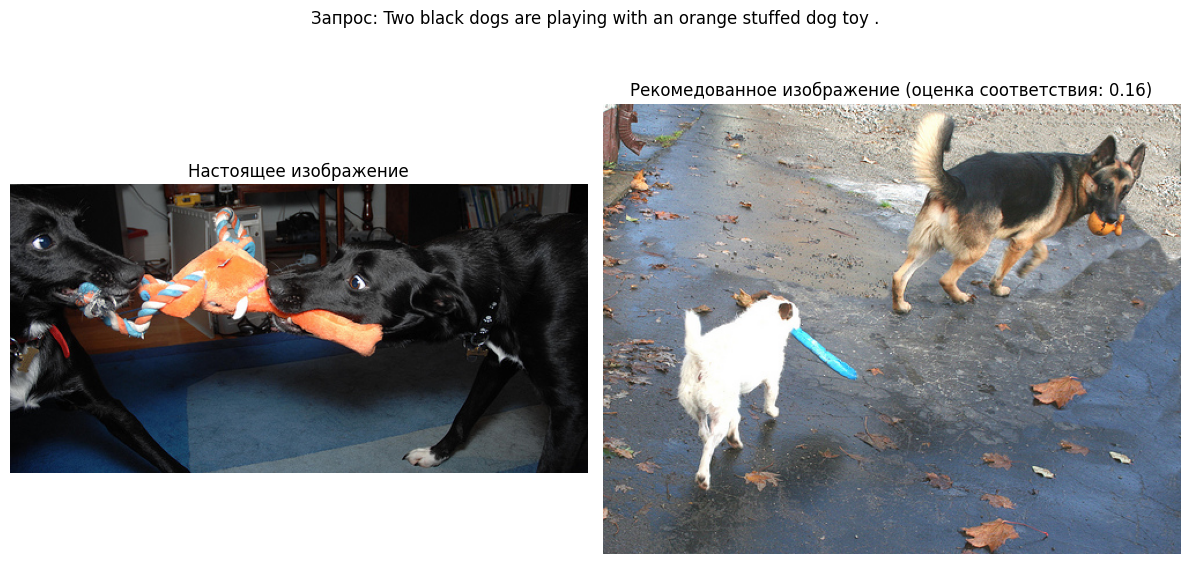

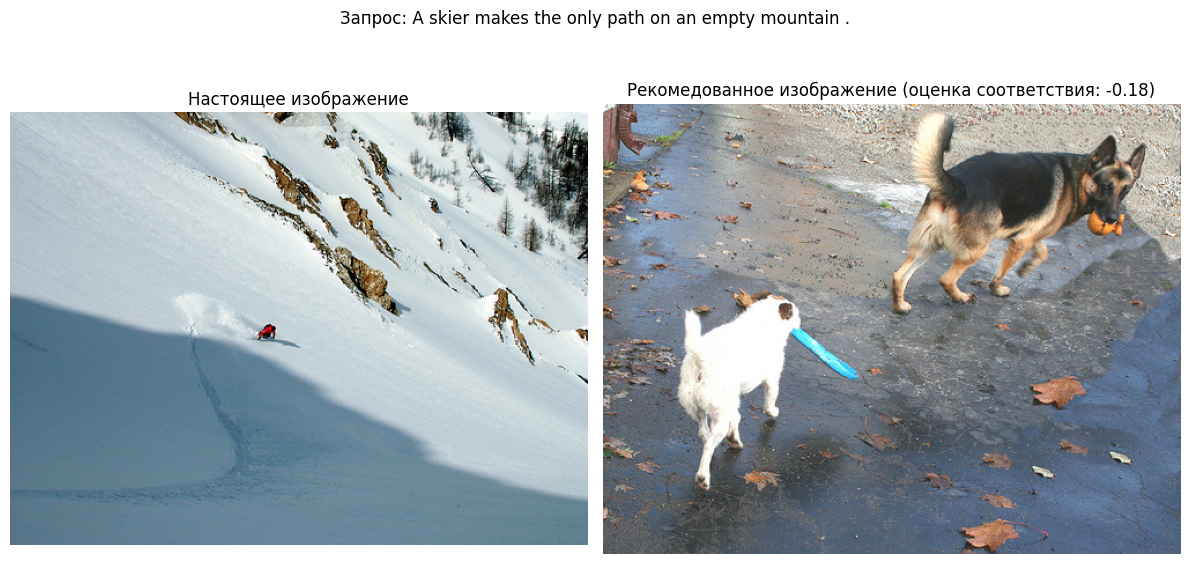

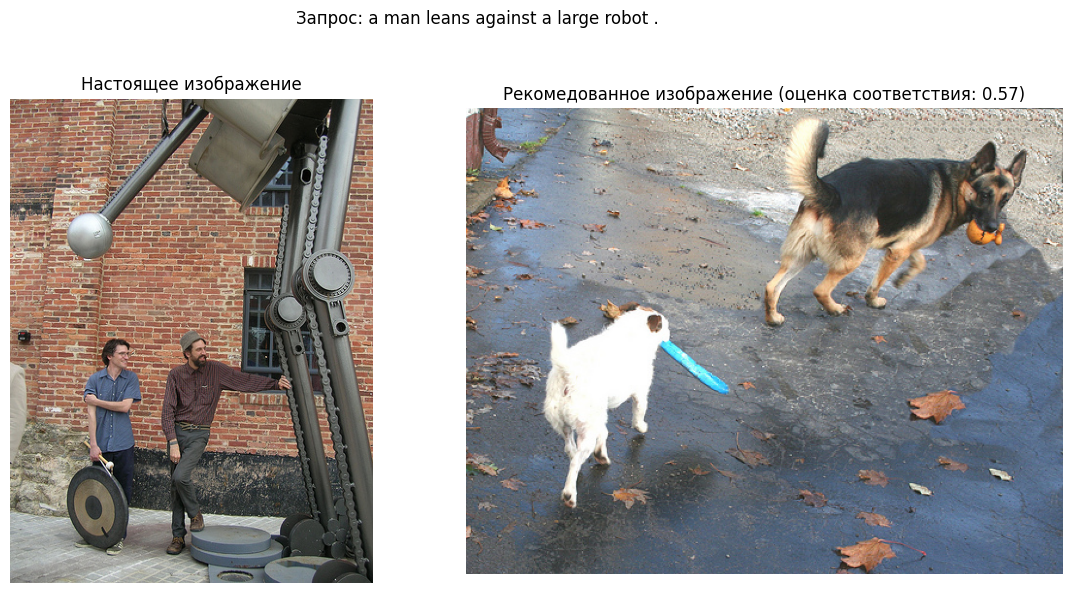

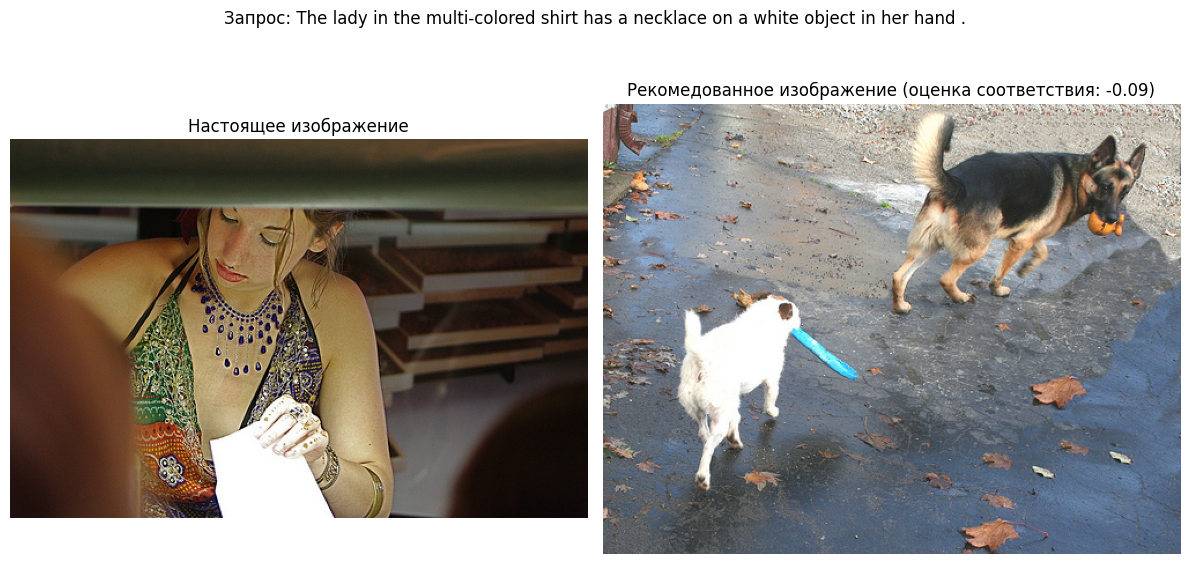

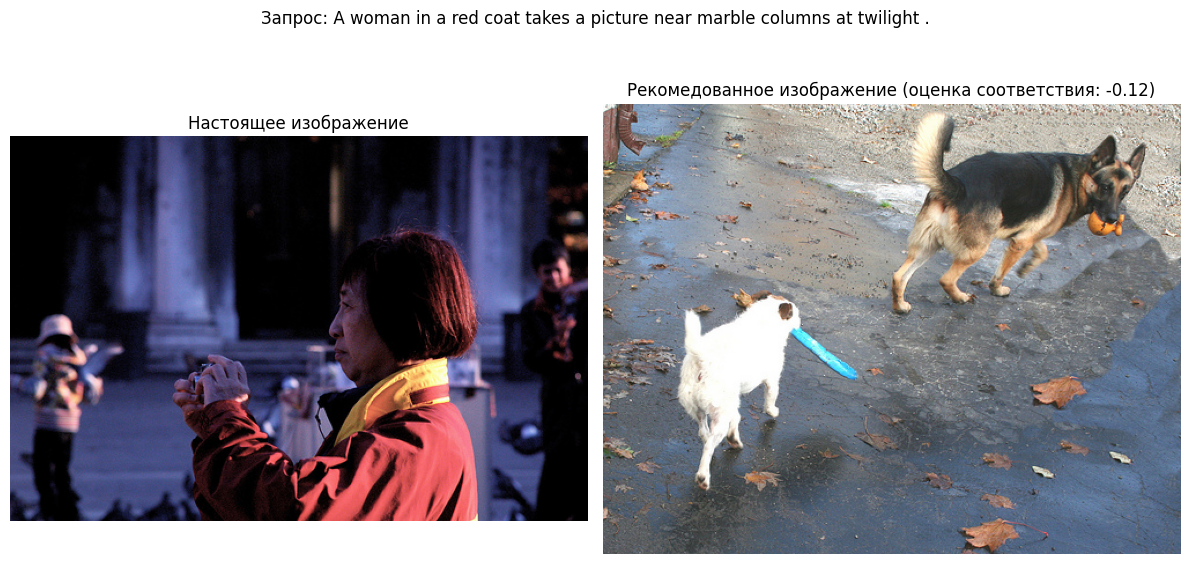

In [95]:
for p in predictions: 
    if p == None:
        continue

    query = p[0]
    true_image = plt.imread('/kaggle/input/dsplus-sp4/to_upload/test_images/' + p[1])
    predicted_image = plt.imread('/kaggle/input/dsplus-sp4/to_upload/test_images/' + p[2])
    score = p[3]
    
    # Create a figure with one row for the text and two columns for the images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the query text as the title of the figure
    fig.suptitle("Запрос: " + query, fontsize=12)
    
    # Display the true image
    ax[0].imshow(true_image)
    ax[0].set_title('Настоящее изображение')
    ax[0].axis('off')
    
    # Display the predicted image
    ax[1].imshow(predicted_image)
    ax[1].set_title(f'Рекомедованное изображение (оценка соответствия: {str(round(score, 2))})')
    ax[1].axis('off')
    
    # Adjust layout and show plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the suptitle
    plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
   
 - слишком мало данных для обучения   
 - при подготовке признаков допущена ошибка - вектора изображений перепутаны и фактически модель училась на "мусоре". также пропущен этап предобработки изображений 
   
 - вместо эмбедингов изображений (полученных на выходе из модели BERT) ты использвал токены и маски
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил все ошибки, что ты привел выше, кажется. Качество поиска к сожалению не улучшилось, но модели регресии явно стали лучше обучаться.

</div>

Для демонстрации работы модели была написана фукнция поиска наиболее релевантного изображения из тестовой выборки по запросу. Для выполнения такого поиска все изображения из тестовой выборе были преобразованы в вектора признаков с помощью нейронной сети ResNet50, исходный текстовый запрос был преобразован в векторный формат с помощью модели Bert, затем производится предсказание коэффициента соответствия каждого из изображений текстовому запросу с использованием уже обученной модели и путем ранжирования результатов предсказания модели позвращается наиболее релевантное изображение, т.е. изображение с наибольшим значением коэффициента соответствия.

Как видно из результатов работы функции поиска выше, модель работает не совсем корректно, так как на любой текстовый запрос возвращается одна и та же картинка. Для дальнейшего изучения и отладки работы модели необходимо более глубокое погружение в процесс генерации векторных признаков из изображений и из текстовых описаний, а так же более глубокое понинмание диагностики регрессионных моделей, что остается за рамками данной работы.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

## Демонстрационное решение с использованием CLIP

In [96]:
clip_model = SentenceTransformer("clip-ViT-B-32")

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [97]:
img_names = test_images['image'].tolist()

In [98]:
img_emb = clip_model.encode(
    [Image.open(os.path.join(DATA_PATH, 'test_images', image)) for image in img_names], 
    batch_size=32, 
    convert_to_tensor=True, 
    show_progress_bar=True
)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [99]:
img_emb.shape

torch.Size([100, 512])

In [100]:
def search(query, k=1):
    query_emb = clip_model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    print("Запрос:", query)
    for hit in hits:
        display(IPImage(os.path.join(DATA_PATH, 'test_images', img_names[hit['corpus_id']]), width=200))

Запрос: A baby holds a game control above its head and laughs .


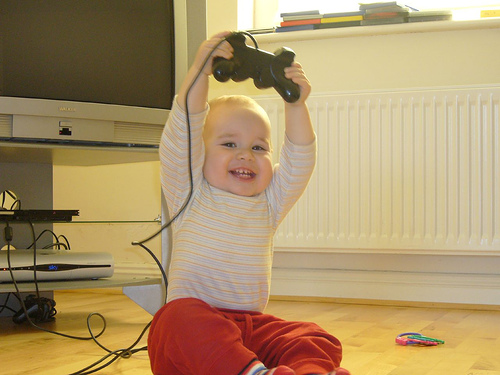

Запрос: Little girl feeds the ducks .


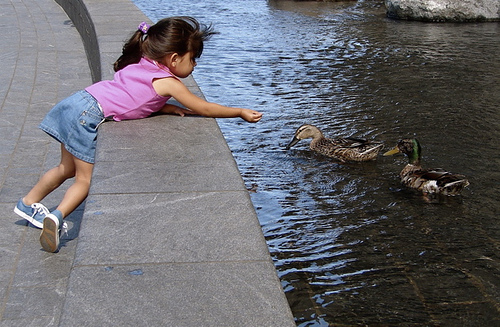

Запрос: A group of three females and one male dressed in costume


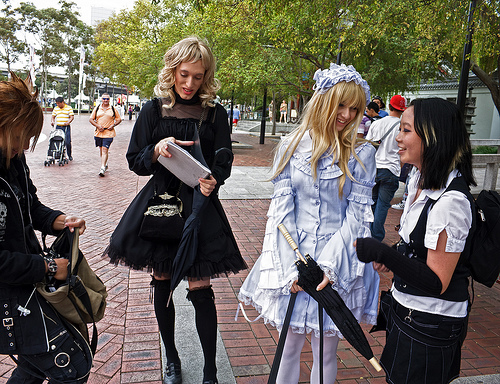

Запрос: Men playing with a red ring out in the field .


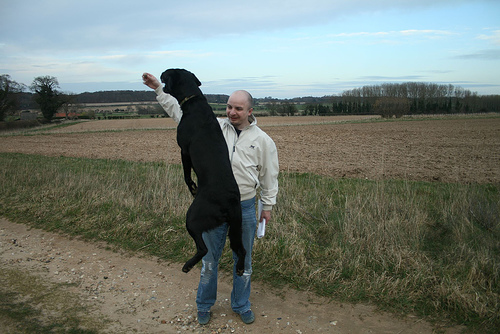

Запрос: A child in a green shirt balancing on a red rope while holding two white ropes .


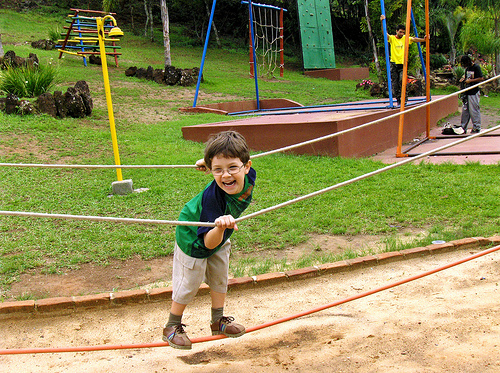

Запрос: Men in a khaki-colored tent outside in a rundown area .


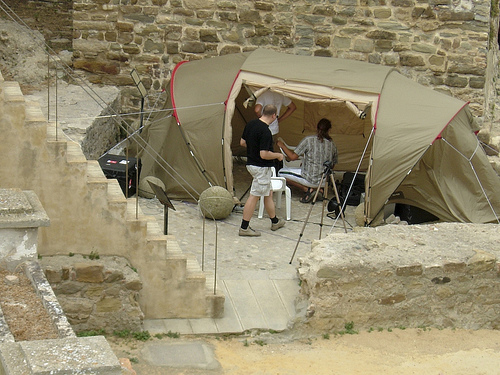

Запрос: The lady in the multi-colored shirt has a necklace on a white object in her hand .


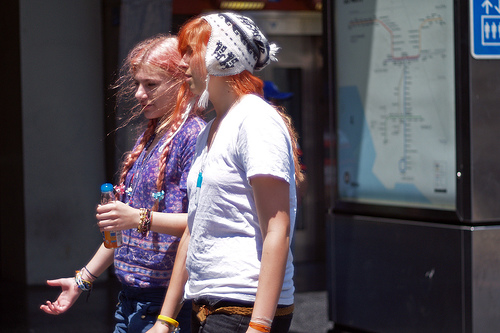

Запрос: The middle eastern woman wearing the pink headscarf is walking beside a woman in a purple headscarf .


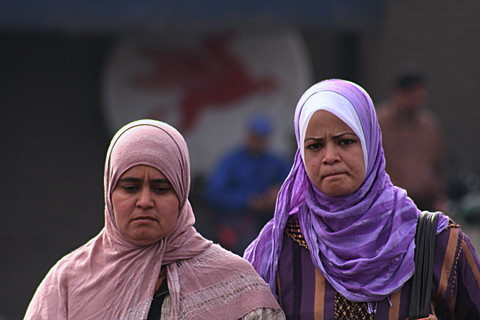

Запрос: Three men form an arch during a BMX bike race sponsored by Coca-Cola .


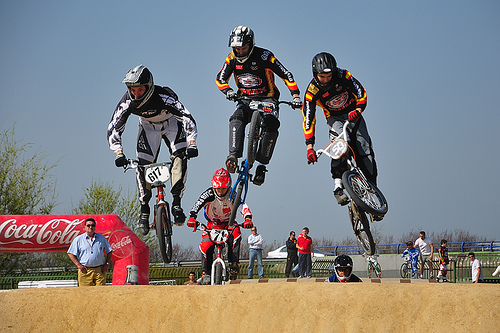

Запрос: a man wearing red socks playing running with some other men


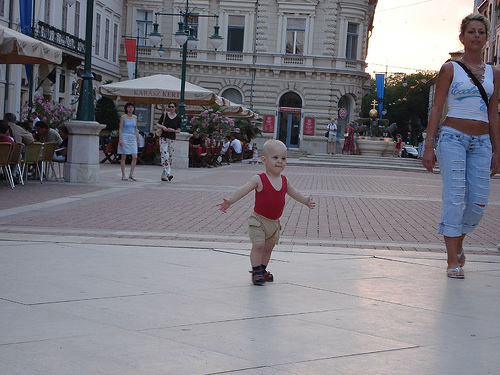

In [101]:
queries = df_test.sample(10)['query_text']

for q in queries:
    search(q)

Для демонстрации возможностей готовых предобученных нейронных сетей было реализованно демонстрационное решение по поиску наиболее релевантного изображение по текстовому описанию с помощью нейросети CLIP. Как видно из результатов работы сети, поиск работает очень точно, а с использованием библиотеки SentenceTransformer (https://www.sbert.net/examples/applications/image-search/README.html) реализация такого поиска занимает несколько строк кода.

## 8. Выводы

В данной работе была разработать демонстрационную версия сервиса поиска изображений по запросу. Для демонстрационной версии была обучена модель, которая генерирует векторное представление изображения, векторное представление текста, а на выходе выдает число коэффициент соответствия текста и картинки. 

**Исследовательский анализ исходных данных**

Данные с оценками исполнителей содержат 47830 пар имя картинки - идентификатор описания. Из распределения доли оценок исполнителей, подтвердивших соответсвие картинки и текста, можно сделать вывод, что подавляющее большинство изображений не соответствует описанию и соответсвует не совсем точно и лишь небольшая доля изображений (<3%) полностью соответствует описанию, по мнению исполнителей.

Данные с оценками экспертов содержат 5822 пар имя картинки - идентификатор описания, что намного меньше количества записей с оценками исполнителей. То есть как минимум для части изображений отсутствуют данные об оценках экспертов. Из распределения оценок экспертов можно сделать выводы, что оценки 1 и 2, говорящие о низком соответсвии изображения картинке встречаются наиболее часто, в то время как оценки 3 и особенно 4 встречаются редко. Так же можно заключить, что эксперт №1 присваивает высокии оценки соответсвия реже, чем эксперты №2 и №3.

Оценки экспертов были объединены в единый коэффициент соответсвия изображения описанию при помощи простого суммирования оценок трех экспертов. Суммы были нормализованы, чтобы привести финальный коэффициент к диапозону от 0 до 1 для простоты дальнейшей работы.

В обучающей выборке содержатся 5822 записей с информацией об 1000 уникальных изображений и 977 уникальных описаний изображений, то есть одному изображению может соответствовать несколько описаний, а так же к одному описанию может подходить несколько изображений. После объединения информации об изображениях и текстовых описаниях в обучающей выборке с финальным коэффициентом соответсвия, полученным на основе оценок экспертов, получился набор данных размером 3918 записей.

Тестовая выборка содержит 100 изображений, а так же 500 пар соответствий изображения и текстового описания.

**Результаты обучения модели**

С помощью предобученной нейронной сети ResNet50 из исходных изображений был извлечен вектор признаков размерностью (3918, 2048), который в дальнейшем был использован для обучения регрессионных моделей.

С помощью модели Bert текст описания изображений был приведен в векторный вид, размерность вектора признаков, полученных из текстовых описаний - (3918, 768).

Вектора признаков изображений и текстовых описаний были объединены в единый вектор признаков, итоговая размерность вектора признаков - (3918, 2816). Признаки были масштабированы с помощью StandardScaler.

Для предсказания коэффициента соответсвия изображения текстовому описанию была обучена модель линейной регрессии с использованием оценки соответсвия, полученной из оценок исполнителей и оценок экспертов, в качестве целевой переменной для регресии. В качестве гиперпараметров модели были использованы и подобраны оптимальные значения скорости обучения и количеста эпох. Модель хорошо обучилась на тренировочных данных, о чем свидетельствует низкий показатель метркики среднеквадратичной ошибки, которая использовалась в качестве функции потерь. Тем не менее, значение среднеквадратичной ошибки на валидационной выборке на несколько порядков выше, чем на обучающей выборке, что свидетельствует о переобучении модели.

С использованием моделей линейной регрессии с регуляризацией удалось существенно снизить переобучаемость модели, что видно по уменьшившейся разнице в значении метрики на обучающей и на валидационной выборках.С использованием моделей линейной регрессии с регуляризацией удалось существенно снизить переобучаемость модели, что видно по уменьшившейся разнице в значении метрики на обучающей и на валидационной выборках.

Далее для предсказания коэффициента соответсвия изображения текстовому описанию была обучена полносвязная нейронная сеть с двумя скрытыми слоями и функциями активации sigmoid и relu. Были подобраны оптимальные значения скорости обучения и количеста эпох. Полносвязаная нейронная сеть показала меньшую точность по метрике среднеквадратичной ошибки на тренировочных данных, но существенно лучшую точность на валидационной выборке. Разница в метрике между тренировочной и валидацонной выборками не велика, что говорит о том, что модель хорошо обучилась и научилась хорошо обобщать выводы.

По итогам сравнения результатов работы моделей линейной регресии и полносвязной нейронной сети, лучшую точность на валидационной выборке показала модель линейной регрессии с L2 регуляризацией (Ridge Regression). В дальнейшем для тестирования работы модели и для реализации функции поиска изображения из тестовой выборке по запросу будем использрвать именно эту модель.По итогам сравнения результатов работы моделей линейной регресии и полносвязной нейронной сети, лучшую точность на валидационной выборке показала модель линейной регрессии с L2 регуляризацией (Ridge Regression).

**Тестирование модели**

Для демонстрации работы модели была написана фукнция поиска наиболее релевантного изображения из тестовой выборки по запросу. Для выполнения такого поиска все изображения из тестовой выборе были преобразованы в вектора признаков с помощью нейронной сети ResNet50, исходный текстовый запрос был преобразован в векторный формат с помощью модели Bert, затем производится предсказание коэффициента соответствия каждого из изображений текстовому запросу с использованием уже обученной модели и путем ранжирования результатов предсказания модели позвращается наиболее релевантное изображение, т.е. изображение с наибольшим значением коэффициента соответствия.

Как видно из результатов работы функции поиска выше, модель работает не совсем корректно, так как на любой текстовый запрос возвращается одна и та же картинка. Для дальнейшего изучения и отладки работы модели необходимо более глубокое погружение в процесс генерации векторных признаков из изображений и из текстовых описаний, а так же более глубокое понинмание диагностики регрессионных моделей, что остается за рамками данной работы.

Для демонстрации возможностей готовых предобученных нейронных сетей было реализованно демонстрационное решение по поиску наиболее релевантного изображение по текстовому описанию с помощью нейросети CLIP. Как видно из результатов работы сети, поиск работает очень точно, а с использованием библиотеки SentenceTransformer (https://www.sbert.net/examples/applications/image-search/README.html) реализация такого поиска занимает несколько строк кода.Для демонстрации возможностей готовых предобученных нейронных сетей было реализованно демонстрационное решение по поиску наиболее релевантного изображение по текстовому описанию с помощью нейросети CLIP. Как видно из результатов работы сети, поиск работает очень точно, а с использованием библиотеки SentenceTransformer (https://www.sbert.net/examples/applications/image-search/README.html) реализация такого поиска занимает несколько строк кода.


- [x] Jupyter Notebook открыт
-[x] Весь код выполняется без ошибок
-[x] Ячейки с кодом расположены в порядке исполнения
-[x] Исследовательский анализ данных выполнен
-[x] Проверены экспертные оценки и краудсорсинговые оценки
-[x] Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
-[x] Изображения векторизованы
-[x] Текстовые запросы векторизованы
-[x] Данные корректно разбиты на тренировочную и тестовую выборки
-[x] Предложена метрика качества работы модели
-[x] Предложена модель схожести изображений и текстового запроса
-[x] Модель обучена
-[x] По итогам обучения модели сделаны выводы
-[x] Проведено тестирование работы модели
-[x] По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
Критичные моменты подсветил красными комментариями.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Спасибо за ревью! Кажется исправил все критичные недочеты в предобработке данных и обучении модели. Качество поиска существенно улучшить не удалось, поэтому добавил раздел с демонстрационным решением для заказчика с использованием CLIP, как ты и посоветовал. 

</div>